In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [62]:
dataset.shape

(1056, 30)

In [63]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                                                   0
Relative number of N  atoms                                       0
Relative number of Cl atoms                                       0
Wiener index                                                      0
Kier&Hall index (order 3)                                         0
Average Information content (order 0)                             0
Balaban index                                                     0
Max partial charge for a N  atom [Zefirov's PC]                   0
Min partial charge for a N  atom [Zefirov's PC]                   0
Polarity parameter / square distance                              0
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 0
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 0
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    0
LUMO energy                                                       0
LUMO+1 energy                                   

In [64]:
dataset.isnull().count()

Number of atoms                                                   1056
Relative number of N  atoms                                       1056
Relative number of Cl atoms                                       1056
Wiener index                                                      1056
Kier&Hall index (order 3)                                         1056
Average Information content (order 0)                             1056
Balaban index                                                     1056
Max partial charge for a N  atom [Zefirov's PC]                   1056
Min partial charge for a N  atom [Zefirov's PC]                   1056
Polarity parameter / square distance                              1056
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 1056
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 1056
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    1056
LUMO energy                                                       1056
LUMO+1

In [65]:
x = dataset.drop(['Act'],axis=1).astype(float)
y = dataset['Act']

In [66]:
x.shape

(1056, 29)

In [67]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [68]:
 x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state=47, shuffle=True) 

In [69]:
x_test.shape

(212, 29)

In [70]:
y_test.shape

(212,)

In [71]:
y_train.shape

(844,)

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
regressor = RandomForestRegressor ( n_estimators = 700, max_depth=None, 
                                   max_features='auto',  
                                   min_samples_split=2,min_samples_leaf=1, random_state=42)


In [74]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [75]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=700, random_state=42)

In [76]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:10.828000


In [77]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [78]:
y_pred_train = regressor.predict(x_train)

In [79]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [80]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [81]:
 # model evaluation for testing set
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

In [82]:
print("The model performance for testing set")
print("--------------------------------------") 
print('MAE is {}'.format(mae)) 
print('MSE is {}'.format(mse)) 
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.15580790200359387
MSE is 0.053610641141396076
R2 score is 0.7946586501022634


In [83]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [84]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.07194970229293622
MSE is 0.011071012756407728
R2 score is 0.9520620967855276


In [85]:
cvscoreval = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [86]:
print("The CV score for Training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoreval))

The CV score for Training set
--------------------------------------
[0.71405681 0.53042261 0.6699819  0.58563884 0.60853859]
Q2 is 0.6217277521643647


In [28]:
#Performance on Out-bag sample 
# R2 value on unseen data (cross validation using hold-out set concept)
random_forest_out_of_bag = RandomForestRegressor(oob_score=True,n_estimators =1900, max_features='auto', random_state = 42)

In [29]:
random_forest_out_of_bag.fit(x_train, y_train)


RandomForestRegressor(n_estimators=1900, oob_score=True, random_state=42)

In [30]:
print(random_forest_out_of_bag.oob_score_)

0.651952108202603


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

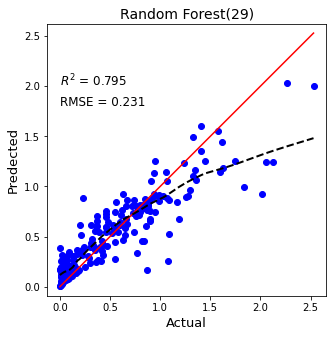

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.795', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.231', fontsize = 12)
plt.title('Random Forest(29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], c='black', linestyle='dashed', linewidth=2)

plt.show()

<ipython-input-91-4e7325139b61>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "black" (-> color=(0.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'black', linestyle='-', c='red', linewidth = 2 )


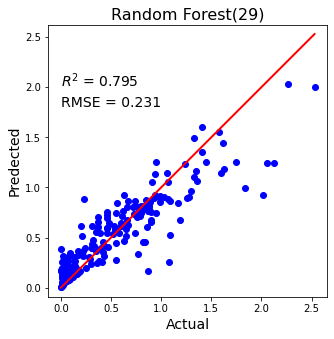

In [91]:
# add the best fit line to the scatter plot
plt.figure(figsize=(5,5))
plt.yscale('linear')
plt.xscale('linear')
plt.scatter(y_test, y_pred, c='blue', marker='o')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'black', linestyle='-', c='red', linewidth = 2 )
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predected', fontsize=14)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.795', fontsize = 14)
plt.text(0, 1.8, 'RMSE = 0.231', fontsize = 14)
plt.title('Random Forest(29)', fontsize = 16)
plt.show()

<ipython-input-30-22c36ac0ca05>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "black" (-> color=(0.0, 0.0, 0.0, 1.0)). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'black', linestyle='dashed', c='red', linewidth = 2 )


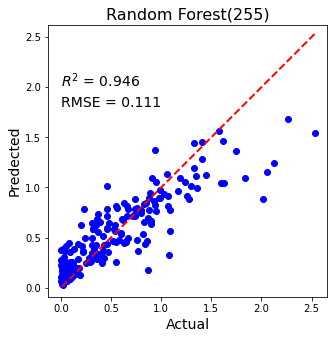

In [30]:
#Trainong set predection plot 
# add the best fit line to the scatter plot
plt.figure(figsize=(5,5))
plt.yscale('linear')
plt.xscale('linear')
plt.scatter(y_test, y_pred, c='blue', marker='o')

p1 = max(max(y_pred_train), max(y_train))
p2 = min(min(y_pred_train), min(y_train))
plt.plot([p1, p2], [p1, p2], 'black', linestyle='dashed', c='red', linewidth = 2 )
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predected', fontsize=14)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.946', fontsize = 14)
plt.text(0, 1.8, 'RMSE = 0.111', fontsize = 14)
plt.title('Random Forest(255)', fontsize = 16)
plt.show()

In [ ]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#number of trees in the random forest 
n_estimators = [10,50,100,150,200,250,300, 350, 400, 450, 500, 550, 600, 700, 800, 800, 1000, 1500, 1600, 1700, 1800, 1900, 2000]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [None,1,2,3]
#Minimum number ofsamples required to split a node 
min_samples_split =[2, 3, 4, 5, 6]
#Minimum number ofsamples required at each leaf node
min_samples_leaf =[1,2]


In [ ]:
# creatting parameter gride
param_grid_regressor= {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                      'min_samples_leaf':min_samples_leaf }

In [ ]:
regressor1_random = RandomizedSearchCV(estimator = regressor, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [ ]:
regressor1_random.fit(x_train, y_train)

In [ ]:
regressor1_random.best_params_

In [ ]:
regressor1_random.best_score_

In [ ]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#RandomForestRegressor?

In [ ]:
#number of trees in the random forest 
n_estimators = [1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1900, 2000]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [None,1, 2, 4,3]
#Minimum number ofsamples required to split a node 
min_samples_split =[2, 3, 4, 5]
#Minimum number ofsamples required at each leaf node
min_samples_leaf =[1,2,3,4]
#mathod of selceting samples of training each tree 

In [ ]:
# creatting parameter gride
param_grid_regressor1= {'n_estimators': n_estimators,
                       'max_features': max_features,
                      'min_samples_split':min_samples_split }

In [ ]:
print (param_grid_regressor1)

In [ ]:
regressor1_grid = GridSearchCV( estimator = regressor, param_grid = param_grid_regressor1,
                              cv = 5, verbose = 2, n_jobs= -1, scoring = "neg_mean_squared_error")

In [ ]:
regressor1_grid.fit(x_train, y_train)

In [ ]:
regressor1_grid.best_params_

In [ ]:
regressor1_grid.best_score_